<a href="https://colab.research.google.com/github/namnitha/CE888-Data-Science/blob/master/Lab2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
    a = np.random.choice(sample,(n_iterations,sample_size))
    data_mean = np.mean(a)
    mean_ar = []
    for i in range(n_iterations):
      mean =  np.mean(a[i, :])
      mean_ar.insert(i,mean)
    lower = np.percentile(mean_ar, 2.5)
    upper = np.percentile(mean_ar, 97.5)
    return data_mean, lower, upper


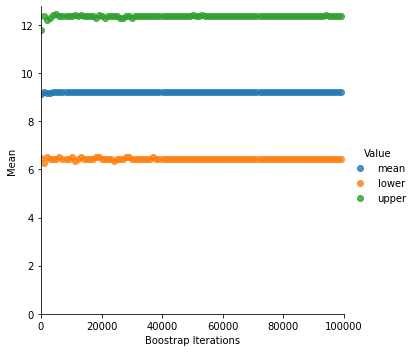

In [4]:
# Call your bootstrap function and plot the results
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):

    a = np.random.choice(sample,(n_iterations,sample_size))
    data_mean = np.mean(a)
    mean_ar = []
    for i in range(n_iterations):
      mean =  np.mean(a[i, :])
      mean_ar.insert(i,mean)
    l_pr = (100 - ci)/2
    u_pr = ((100 - ci)/2) + ci
    lower = np.percentile(mean_ar, l_pr)
    upper = np.percentile(mean_ar, u_pr)
    return data_mean, lower, upper

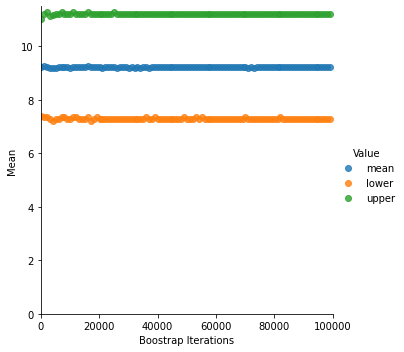

In [6]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [0]:
# Load the data
dfv = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
datav = df.values.T[1]

NameError: ignored

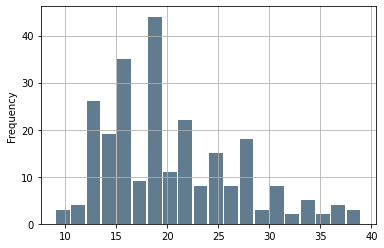

In [8]:
nump_ar = np.array(dfv)
cf = nump_ar[:,0]
size, scale = 1000, 10
commutes = pd.Series(cf)
commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Current Fleet')
plt.xlabel('Counts')
plt.ylabel('No of Fleet')
plt.grid(axis='y', alpha=0.75)

In [0]:
nump_ar = np.array(dfv)
nf = nump_ar[:,1]

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(nf)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('New Fleet')
plt.xlabel('Counts')
plt.ylabel('No of Fleet')
plt.grid(axis='y', alpha=0.75)


In [9]:
import matplotlib.pyplot as plt

N = len(cf)
x = cf
y = nf
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, alpha=0.5)
plt.show()

NameError: ignored

Histogram for current fleet
Histogram for Proposed Fleet


NameError: ignored

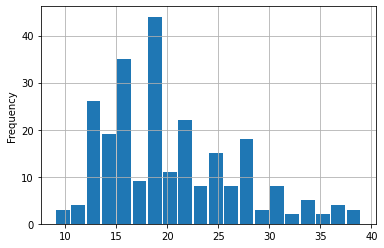

In [10]:
print("Histogram for current fleet")
commutes = pd.Series(cf)
commutes.plot.hist(grid = True, bins = 20, rwidth = 0.9)

print("Histogram for Proposed Fleet")
x = nf[~np.isnan(nf)]
commutes1 = pd.Series(x)
commutes1.plot.hist(grid = True, bins = 20, rwidth = 0.9)

In [0]:
mean_cf = np.mean(cf)
nf = nf[~np.isnan(nf)]
mean_nf = np.mean(nf)

t_obs = mean_cf - mean_nf

print(mean_cf)
print(mean_nf)

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(cf, cf.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)


boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(nf, nf.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [12]:
for i in range(20000):
  mean_cf = np.mean(cf)
  nf = nf[~np.isnan(nf)]
  mean_nf = np.mean(nf)

  t_obs = mean_cf - mean_nf

  concat = np.concatenate((cf, nf))
  perm = np.random.permutation(concat)

  pold = perm[:int(len(perm)/2)]
  pnew = perm[int(len(perm)/2):]

  mean_new_cf = np.mean(pold)
  mean_new_nf = np.mean(pnew)
  t_new_obs = mean_new_cf - mean_new_nf

print(t_new_obs)


NameError: ignored